# Predict Career Longevity for NBA Rookies

![Basketball](https://i.imgur.com/YIaYQ8C.png)

For this project you are going to build your own binary classification model using Scikit-learn to predict if the NBA rookie will last for 5 years in the league if provided with some information such as Games played, assists, steals and turnovers …. etc. 

---

Dataset Source : [Data world](https://data.world/exercises/logistic-regression-exercise-1)

## We will focus on :
    
    1) features selection using heatmap correlation
    2) Logistic regression



# Task 1: Import libraries and load the data 

# Task 1.1: Import libraries

In [2]:
import pandas as pd # load and manipulate data 
import numpy as np # calculate the mean and standard deviation
import matplotlib.pyplot as plt # drawing graphs
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.linear_model import LogisticRegression # import Logistic regression from sklearn
import warnings # import warnings
import sklearn.metrics as metrics # import metrics 
import seaborn as sns # import seaborn for visualization 
from sklearn.preprocessing import MinMaxScaler #import min max scaler
from IPython.display import Image # library to import image
from sklearn.metrics import confusion_matrix#confusion matrix
from yellowbrick.classifier import ROCAUC#Discriminationthreshold

# Task 1.2: Load the dataset 

In [3]:
#import the dataframe 
df=pd.read_csv("nba_logreg.csv")

In [4]:
#load the dataframe head
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [5]:
#dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

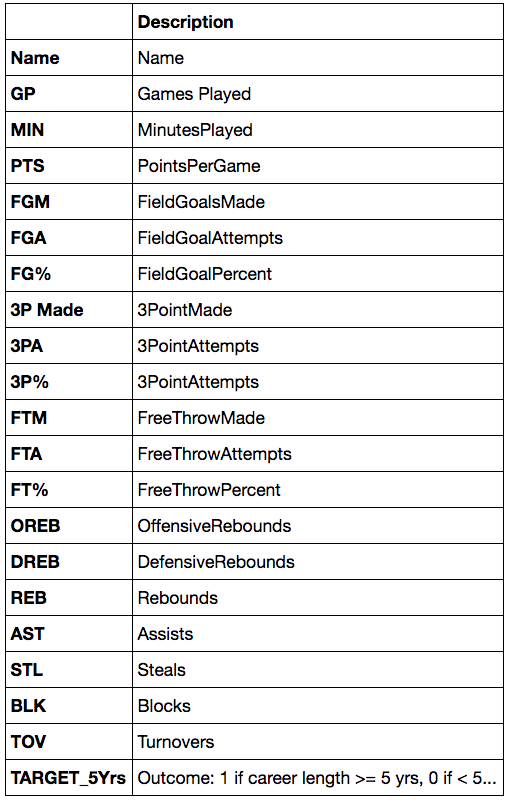

In [6]:
#Import the description table
Image(filename="table.png",width=300,height=100)

# Task 2: Find Insights in the data

In [7]:
#class imbalance
df["TARGET_5Yrs"].value_counts()

TARGET_5Yrs
1.0    831
0.0    509
Name: count, dtype: int64

In [8]:
# drop null values
df=df.dropna()

In [9]:
df.isnull().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

In [10]:
#Group all the observations by (Target_5yrs)
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Calcular la media de las columnas numéricas agrupadas por "TARGET_5Yrs"
Average_stats = df.groupby(["TARGET_5Yrs"])[numeric_columns].mean()


In [11]:
#Test
Average_stats

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
TARGET_5Yrs,,,,,,,,,,,,,,,,,,,,
0.0,51.495030,14.276740,5.060636,1.951093,4.562425,42.270775,0.232406,0.763618,19.378131,0.928231,1.324254,69.122266,0.713519,1.522863,2.234592,1.230815,0.500000,0.249901,0.944732,0.0
1.0,65.826877,19.700847,7.891646,3.051090,6.718523,45.242131,0.260169,0.799031,19.265496,1.530872,2.133656,71.189588,1.186683,2.325061,3.511864,1.758838,0.693705,0.436925,1.349031,1.0


In [12]:
#Transpose the data frame
df_transposed=Average_stats.T

In [13]:
#Test
df_transposed

TARGET_5Yrs,0.0,1.0
GP,51.495030,65.826877
MIN,14.276740,19.700847
PTS,5.060636,7.891646
FGM,1.951093,3.051090
FGA,4.562425,6.718523
FG%,42.270775,45.242131
3P Made,0.232406,0.260169
3PA,0.763618,0.799031
3P%,19.378131,19.265496
FTM,0.928231,1.530872


Text(0.5, 1.0, ' features values by label')

<Figure size 1200x1000 with 0 Axes>

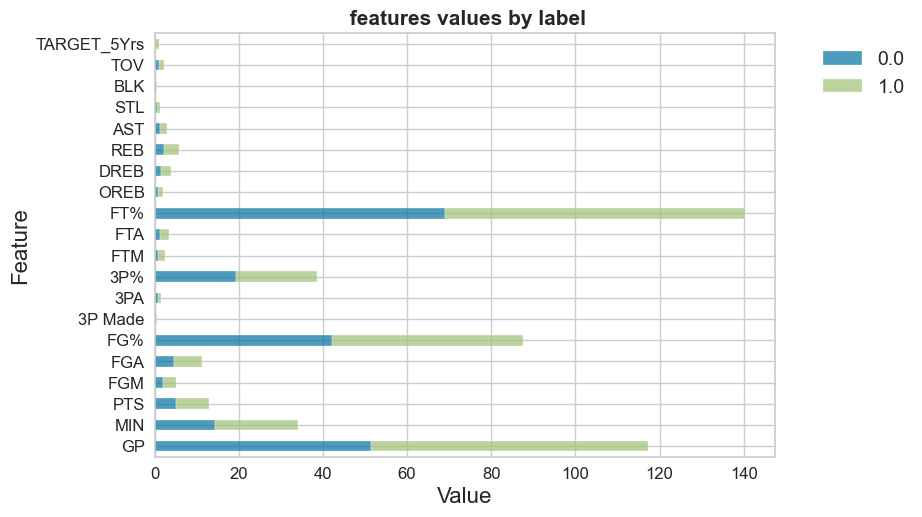

In [14]:
#Visualize the data for insights
# Importar seaborn y establecer el estilo
sns.set_style("whitegrid")

# Luego, puedes continuar con el resto de tu código
table = df_transposed
plt.figure(figsize=(12, 10))
a = table.plot(stacked=True, kind="barh", alpha=0.7)

#Decorating the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 14})
plt.xlabel('Value',fontsize=16)
plt.ylabel('Feature',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(' features values by label',fontsize=15,weight='bold')

# Task 3: Features reduction based on correlation

In [15]:
# Labels and features split
X=df.iloc[:,1:-1]
Y=df.iloc[:,-1]

In [16]:
Y.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: TARGET_5Yrs, dtype: float64

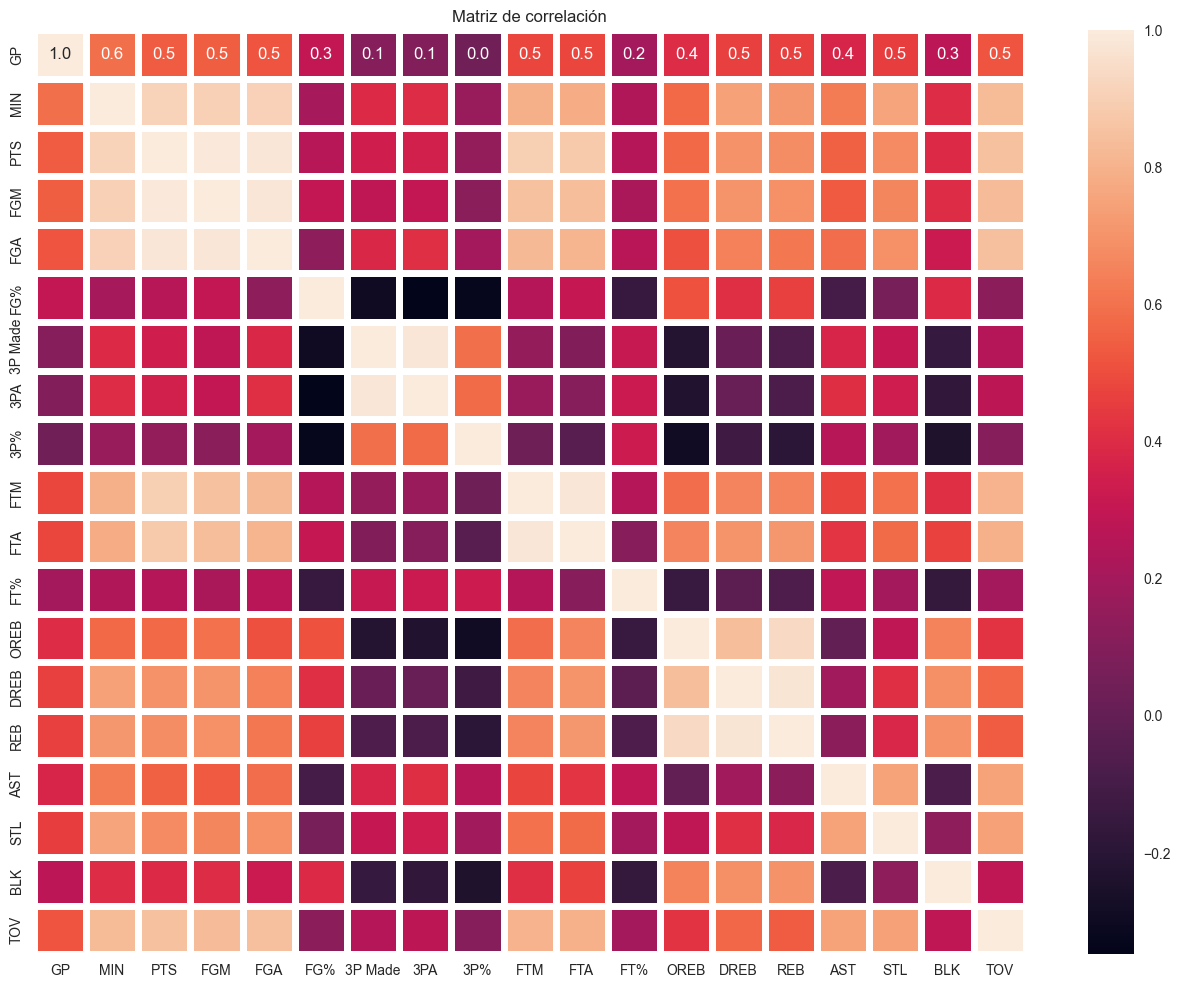

In [17]:

# Visualiza la matriz de correlación con seaborn
plt.figure(figsize=(16, 12))
sns.heatmap(X.corr(), annot=True, fmt=".1f", linewidths=5)
plt.title('Matriz de correlación')
plt.show()

In [18]:
X.corr()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
GP,1.000000,0.590596,0.539069,0.543000,0.517395,0.296987,0.108195,0.099626,0.038209,0.483185,0.480136,0.197743,0.400184,0.467467,0.460390,0.374311,0.452726,0.276700,0.518693
MIN,0.590596,1.000000,0.911746,0.902864,0.910194,0.208341,0.389474,0.402814,0.165997,0.791089,0.779813,0.236160,0.573655,0.747065,0.710853,0.629147,0.757050,0.401011,0.826431
PTS,0.539069,0.911746,1.000000,0.990874,0.979676,0.261587,0.345289,0.355198,0.151072,0.896245,0.880826,0.254404,0.576421,0.696560,0.679002,0.551561,0.674937,0.390496,0.850272
FGM,0.543000,0.902864,0.990874,1.000000,0.980117,0.297113,0.287956,0.297898,0.119493,0.848146,0.840667,0.219423,0.597468,0.705191,0.692678,0.532261,0.662457,0.400744,0.834343
FGA,0.517395,0.910194,0.979676,0.980117,1.000000,0.135815,0.388860,0.412053,0.197160,0.826244,0.805507,0.264405,0.505547,0.642752,0.616497,0.589038,0.689771,0.325503,0.845952
FG%,0.296987,0.208341,0.261587,0.297113,0.135815,1.000000,-0.291573,-0.347680,-0.330690,0.253381,0.306360,-0.150996,0.512346,0.411103,0.466126,-0.103546,0.061130,0.390786,0.126429
3P Made,0.108195,0.389474,0.345289,0.287956,0.388860,-0.291573,1.000000,0.982579,0.589855,0.155717,0.093059,0.312256,-0.218210,0.018688,-0.070865,0.374314,0.305146,-0.155955,0.257015
3PA,0.099626,0.402814,0.355198,0.297898,0.412053,-0.347680,0.982579,1.000000,0.582337,0.170463,0.105784,0.320901,-0.231050,0.013611,-0.079111,0.408066,0.336757,-0.169245,0.282496
3P%,0.038209,0.165997,0.151072,0.119493,0.197160,-0.330690,0.589855,0.582337,1.000000,0.030320,-0.032333,0.326372,-0.288759,-0.122949,-0.191071,0.262120,0.194329,-0.242274,0.108277
FTM,0.483185,0.791089,0.896245,0.848146,0.826244,0.253381,0.155717,0.170463,0.030320,1.000000,0.980626,0.253125,0.586325,0.657652,0.657194,0.474403,0.599534,0.412565,0.804762


In [19]:
#Drop correlated features
X=X.drop(["FGA","FGM","3PA","FTM","DREB"],axis=1)

In [20]:
 # Test
X.head()

,GP,MIN,PTS,FG%,3P Made,3P%,FTA,FT%,OREB,REB,AST,STL,BLK,TOV
0,36,27.4,7.4,34.7,0.5,25.0,2.3,69.9,0.7,4.1,1.9,0.4,0.4,1.3
1,35,26.9,7.2,29.6,0.7,23.5,3.4,76.5,0.5,2.4,3.7,1.1,0.5,1.6
2,74,15.3,5.2,42.2,0.4,24.4,1.3,67.0,0.5,2.2,1.0,0.5,0.3,1.0
3,58,11.6,5.7,42.6,0.1,22.6,1.3,68.9,1.0,1.9,0.8,0.6,0.1,1.0
4,48,11.5,4.5,52.4,0.0,0.0,1.9,67.4,1.0,2.5,0.3,0.3,0.4,0.8


# Task 4:Logistic regression classification

The discrimination threshold is the probability or score at which the positive class is chosen over the negative class. Generally, this is set to 50% but the threshold can be adjusted to increase or decrease the sensitivity to false positives or to other application factors.


In [21]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,Y,stratify=Y,random_state=42)

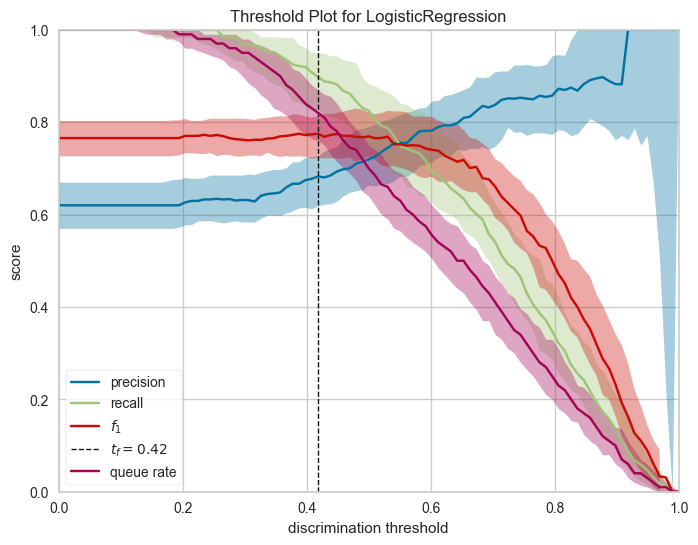

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [22]:
#Discrimination threshold plot 
from yellowbrick.classifier import DiscriminationThreshold
warnings.filterwarnings("ignore")
visualizer=DiscriminationThreshold(LogisticRegression(),size=(800,600))
visualizer.fit(X_train,y_train)
visualizer.poof()

In [23]:
#fit the logistic regression
clf=LogisticRegression().fit(X_train,y_train)

In [25]:
# labels prediction
y_pred=np.where(clf.predict_proba(X_test)[:,1]>0.35,1.0,0)

In [26]:
#transform y_pred array to
y_pred=pd.DataFrame(y_pred)

In [27]:
y_pred

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
328,1.0
329,1.0
330,1.0
331,1.0


## Precision: 
is the ratio of correctly predicted positive observations. The question that tis metric answers is "how many actually survived of all the passengers who are labeled as servived? High precision relates to the low false positive rate. Precision=TP/(TP+FP)
## Recall:
is the ratio of correctly predicted positive observations to the all observations in actual class- The question that the recall answers is : Of all the passengers that truly survived, how many did we label?
Recall=TP/(TP+FN)
## F1 score:
F1 score is the weighted average of precision and recall. therefore this score takse both positives and false negatives into account. intuitively it is not as easy to understand as accuracy, but F1 is actually more useful than accuracy specially when you have an uneven class distribution


In [ ]:
#test


# Task 5:Adjust the discrimination threshold

# Task 5.1: the confusion matrix for discrimination threshold of 0.35

In [28]:
#F1_Score
metrics.f1_score(y_test,y_pred)

0.7911646586345381

In [29]:
#Confusion matrix 
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
print("tn ",tn)
print("fp ",fp)
print("fn ",fn)
print("tp ",tp)

tn  32
fp  94
fn  10
tp  197


In [30]:
#test accuracy
test_accuracy=metrics.accuracy_score(y_test,y_pred)
test_accuracy

0.6876876876876877

In [33]:
#precision score
precision_score=metrics.precision_score(y_test,y_pred)
precision_score

0.6769759450171822

In [34]:
#recall score
recall_score=metrics.precision_score(y_test,y_pred)
recall_score

0.6769759450171822

# Task 5.2: the confusion matrix for discrimination threshold of 0.8

In [36]:
#Class label prediction
y_pred=np.where(clf.predict_proba(X_test)[:,1]>0.8,1.0,0)
y_pred=pd.DataFrame(y_pred)

In [37]:
#F1_Score
metrics.f1_score(y_test,y_pred)

0.45878136200716846

In [38]:
#Confusion matrix
#Confusion matrix 
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
print("tn ",tn)
print("fp ",fp)
print("fn ",fn)
print("tp ",tp)

tn  118
fp  8
fn  143
tp  64


In [39]:
#test accuracy
#test accuracy
test_accuracy=metrics.accuracy_score(y_test,y_pred)
test_accuracy

0.5465465465465466

In [40]:
#precision score
precision_score=metrics.precision_score(y_test,y_pred)
precision_score

0.8888888888888888

In [41]:
#recall score
recall_score=metrics.precision_score(y_test,y_pred)
recall_score

0.8888888888888888

# Task 5.3: the confusion matrix for discrimination threshold of 0.2

In [42]:
#Class label prediction
y_pred=np.where(clf.predict_proba(X_test)[:,1]>0.2,1.0,0)
y_pred=pd.DataFrame(y_pred)

In [43]:
#F1_Score
metrics.f1_score(y_test,y_pred)

0.770949720670391

In [44]:
#Confusion matrix
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
print("tn ",tn)
print("fp ",fp)
print("fn ",fn)
print("tp ",tp)

tn  3
fp  123
fn  0
tp  207


In [45]:
#test accuracy
test_accuracy=metrics.accuracy_score(y_test,y_pred)
test_accuracy

0.6306306306306306

In [46]:
#precision score
precision_score=metrics.precision_score(y_test,y_pred)
precision_score

0.6272727272727273

In [47]:
#recall score
recall_score=metrics.precision_score(y_test,y_pred)
recall_score

0.6272727272727273